In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
from statistics import mean
%matplotlib inline

def split_year(x,i):
    a = re.split('[/: ]', x.iloc[i,14])

    return int(a[0])

def split_month(x,i):
    a = re.split('[/: ]', x.iloc[i,14])
    return int(a[1])

def split_day(x,i):
    a = re.split('[/: ]', x.iloc[i,14])
    return int(a[2])

def split_hour(x,i):
    a = re.split('[/: ]', x.iloc[i,14])
    return int(a[3])

def split_min(x,i):
    a = re.split('[/: ]', x.iloc[i,14])
    return int(a[4])

def read_data():
    C = ["201704.csv", "201705.csv", "201706.csv", "201707.csv",
         "201708.csv", "201709.csv", "201710.csv", "201711.csv",
         "201712.csv", "201801.csv", "201802.csv", "201803.csv"]
    data = pd.DataFrame({})
    for i in C:
        read_data = pd.read_csv(i,encoding="cp932")
        data = pd.concat([data, read_data])
    return data

    

In [32]:
def main1(A):
    
    data = read_data()
    x = data[data["HGWID"] ==A]
    
    #データセットの時間データを整理する
    year = [split_year(x,i) for i in range(len(x))]
    month = [split_month(x,i) for i in range(len(x))]
    days = [split_day(x,i) for i in range(len(x))]
    hour = [split_hour(x,i) for i in range(len(x))]
    min = [split_min(x,i) for i in range(len(x))]
    
    #必要なデータの抽出
    mat1 = x["主幹回路の電力量"]
    mat2 = x["太陽光の発電電力量"]
    mat3 = x["太陽光の売却電力量"]
    mat4 = x["蓄電池の充電電力量"]
    mat5 = x["蓄電池の放電電力量"]
    mat6 = x["燃料電池発電電力量"]
    mat7 = x["ガス使用量"]
    mat8 = x["水道使用量"]
    
    #datetimeに変換
    time = []
    for i in range(len(x)):
        d = datetime.datetime(year[i], month[i], days[i], hour[i],min[i])
        time.append(d)
    
    #解析に使用するデータに変換する
    try_data = pd.DataFrame({"年月日時":time, "年":year, "月":month, "日":days, "時":hour,
                              "分":min, "主幹回路の電力量":mat1, "太陽光の発電電力量":mat2, "太陽光の売却電力量":mat3,
                              "蓄電池の充電電力量":mat4, "蓄電池の放電電力量":mat5, "燃料電池発電電力量":mat6, "ガス使用量":mat7,
                              "水道使用量":mat8})
    
    D = (4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3)
    datetime1 = []
    
    for i in range(len(D)):
        
        if D[i] != 1 and D[i] != 2 and D[i] != 3:
            g = datetime.datetime(2017,D[i],1,0)
            datetime1.append(g)
            
        else:
            g = datetime.datetime(2018,D[i],1,0)
            datetime1.append(g)
            
    #一つ目のグラフ用のセット
    T1 = []
    T2 = []
    T3 = []
    T4 = []
    T5 = []
    T6 = []
    
    for i in (4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3):
        
        sum_data = try_data[try_data["月"] == i]
        A = sum(sum_data["主幹回路の電力量"])*10**-4
        B = sum(sum_data["太陽光の発電電力量"])*10**-4
        C = sum(sum_data["太陽光の売却電力量"])*10**-4
        D = sum(sum_data["蓄電池の充電電力量"])*10**-4
        E = sum(sum_data["蓄電池の放電電力量"])*10**-4
        F = sum(sum_data["燃料電池発電電力量"])*10**-4
        T1.append(A)
        T2.append(B)
        T3.append(C)
        T4.append(D)
        T5.append(E)
        T6.append(F)
        
    result2 = pd.DataFrame({"月":datetime1, "主幹回路の総電力量":T1, "太陽光の発電電力量":T2, "太陽光の売却電力量":T3,
                            "蓄電池の充電電力量":T4, "蓄電池の放電電力量":T5, "燃料電池発電電力量":T6})
    
    result2["需要量"] = result2.iloc[:,1] + result2.iloc[:,2] - result2.iloc[:,3] + result2.iloc[:,4] - result2.iloc[:,5] + result2.iloc[:,6]
    
    plt.rcParams["font.family"] = "IPAexGothic"
    plt.plot(result2["月"], result2["需要量"], label ="需要量")
    plt.plot(result2["月"], result2["太陽光の発電電力量"], label ="太陽光発電量")
    plt.plot(result2["月"], result2["蓄電池の充電電力量"], label ="蓄電池の充電電力量")
    plt.plot(result2["月"], result2["燃料電池発電電力量"], label ="燃料電池発電電力量")
    plt.legend()
    plt.show()
    
    print("-"*80)
    
    #二つ目のグラフ用のデータセット
    
    D = (4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3)
    D2 = [0,30]
    T = []
    A = []
    B = []
    C = []
    
    for i in D:
        
        use_data1 = try_data[try_data["月"]==i]

        for s in range(0,24):
            use_data2 = use_data1[use_data1["時"]==s]
            
            for n in D2:
                a = use_data2[use_data2["分"]==n]

                if n == 0:
                    v = sum(a["主幹回路の電力量"])/len(a)
                    T.append(v)
                    A.append(i)
                    B.append(s)
                    C.append(n)
            
                elif n == 30:
                    v = sum(a["主幹回路の電力量"])/len(a)
                    T.append(v)
                    A.append(i)
                    B.append(s)
                    C.append(n)
                    
    result3 = pd.DataFrame({"月":A, "時":B, "分":C, "主幹回路の電力量":T})
    
    datetime3 = []
    
    for i in range(len(result3)):
        if result3.iloc[i,0] != 1 and result3.iloc[i,0] != 2 and result3.iloc[i,0] != 3:
            x = datetime.datetime(2017, 3, 1, result3.iloc[i,1], result3.iloc[i,2])
            datetime3.append(x) 
            
        else:
            g = datetime.datetime(2017, 3, 1, result3.iloc[i,1], result3.iloc[i,2])
            datetime3.append(g)
            
    datetime4 = []
    
    for i in range(len(datetime3)):
        a = str(datetime3[i].hour)+":"+str(datetime3[i].minute)
        datetime4.append(a)
        
    result3["datetime3"] = datetime4
    
    a4 = result3[result3["月"] == 4] 
    a5 = result3[result3["月"] == 5] 
    a6 = result3[result3["月"] == 6] 
    a7 = result3[result3["月"] == 7] 
    a8 = result3[result3["月"] == 8] 
    a9 = result3[result3["月"] == 9] 
    a10 = result3[result3["月"] == 10] 
    a11 = result3[result3["月"] == 11] 
    a12 = result3[result3["月"] == 12] 
    a1 = result3[result3["月"] == 1] 
    a2 = result3[result3["月"] == 2] 
    a3 = result3[result3["月"] == 3] 

    plt.rcParams["font.family"] = "IPAexGothic"

    plt.figure(figsize=(25, 15), dpi=50)

    plt.plot(a4["datetime3"], a4["主幹回路の電力量"], label ="4月の電力量")
    plt.plot(a5["datetime3"], a5["主幹回路の電力量"], label ="5月の電力量")
    plt.plot(a6["datetime3"], a6["主幹回路の電力量"], label ="6月の電力量")
    plt.plot(a7["datetime3"], a7["主幹回路の電力量"], label ="7月の電力量")
    plt.plot(a8["datetime3"], a8["主幹回路の電力量"], label ="8月の電力量")
    plt.plot(a9["datetime3"], a9["主幹回路の電力量"], label ="9月の電力量")
    plt.plot(a10["datetime3"], a10["主幹回路の電力量"], label ="10月の電力量")
    plt.plot(a11["datetime3"], a11["主幹回路の電力量"], label ="11月の電力量")
    plt.plot(a12["datetime3"], a12["主幹回路の電力量"], label ="12月の電力量")
    plt.plot(a1["datetime3"], a1["主幹回路の電力量"], label ="1月の電力量")
    plt.plot(a2["datetime3"], a2["主幹回路の電力量"], label ="2月の電力量")
    plt.plot(a3["datetime3"], a3["主幹回路の電力量"], label ="3月の電力量")
    plt.legend()
    plt.show()

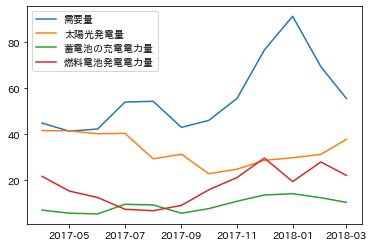

--------------------------------------------------------------------------------


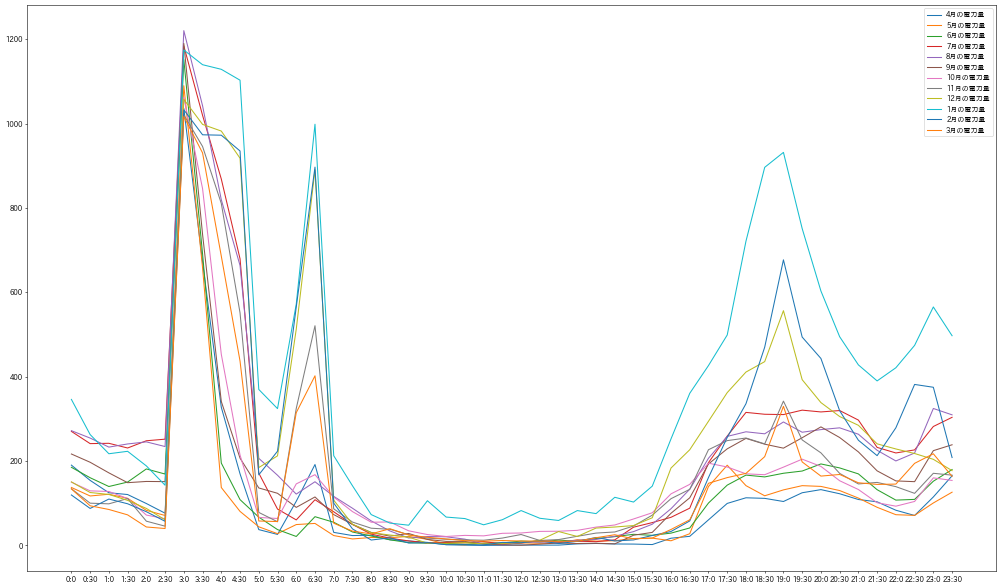

In [33]:
main1("HRM013697310A69")#三人世帯